---
# Data Science and Artificial Intelliegence Practicum
## 6-modul. Deep Learning
---

## 6.3 - Deep Learning Application

In [ ]:
# !pip3 install torch torchvision fastai

In [ ]:
import torch
import fastai

# check versions
print(f"{torch.__version__=}")
print(f"{fastai.__version__=}")

# check if the GPU is working
torch.cuda.is_available()

torch.__version__='2.0.0+cu118'
fastai.__version__='2.7.12'


True

### **Semantic Segmentation**

- ***Semantic Image Segmentation*** - a computer vision task in which the goal is to categorize each pixel in an image into a class or object.

- UCL Reasearch - [Semantic object classes in video: A high-definition ground truth database](http://www0.cs.ucl.ac.uk/staff/G.Brostow/#Research:~:text=Semantic%20object%20classes%20in%20video)

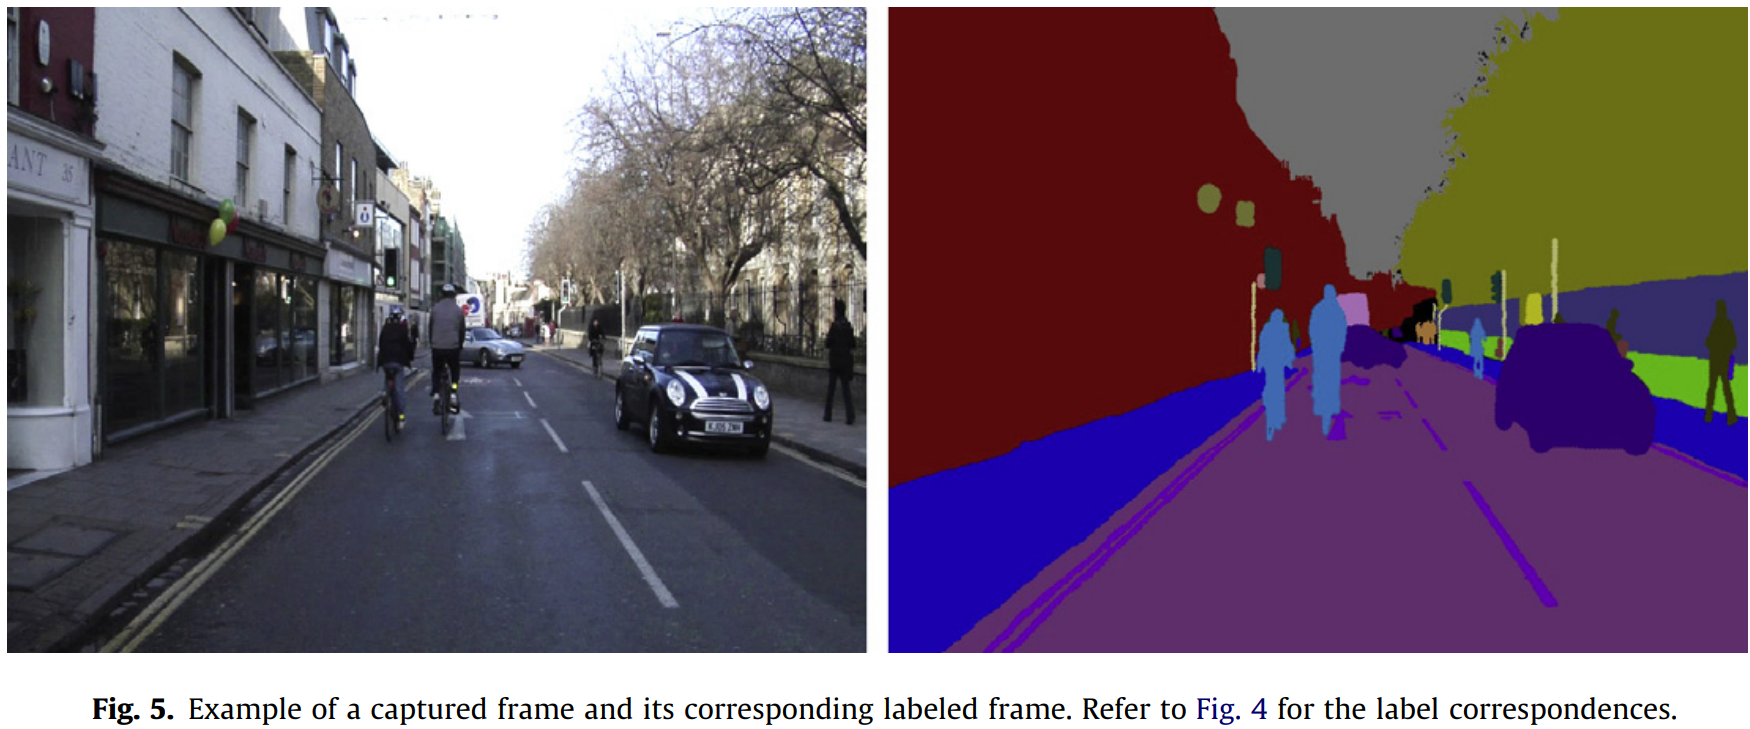

In [ ]:
from fastai.vision.all import *
import numpy as np

path = untar_data(URLs.CAMVID_TINY)

# Label getter function
def label_getter(file):
  return path/"labels"/f"{file.stem}_P{file.suffix}"

# Data Loaders
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/'images'),
    label_func= label_getter, codes=np.loadtxt(path/'codes.txt', dtype=str)
)

#  Fine-tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 336MB/s]


epoch,train_loss,valid_loss,time
0,2.860262,2.153687,00:10


epoch,train_loss,valid_loss,time
0,1.749074,1.675008,00:01
1,1.539947,1.335417,00:01
2,1.440931,1.680158,00:02
3,1.363398,1.174078,00:01
4,1.245342,1.015436,00:01
5,1.127314,0.865428,00:01
6,1.026247,0.793317,00:01
7,0.934218,0.747277,00:01
8,0.854429,0.761001,00:01
9,0.787271,0.729613,00:01


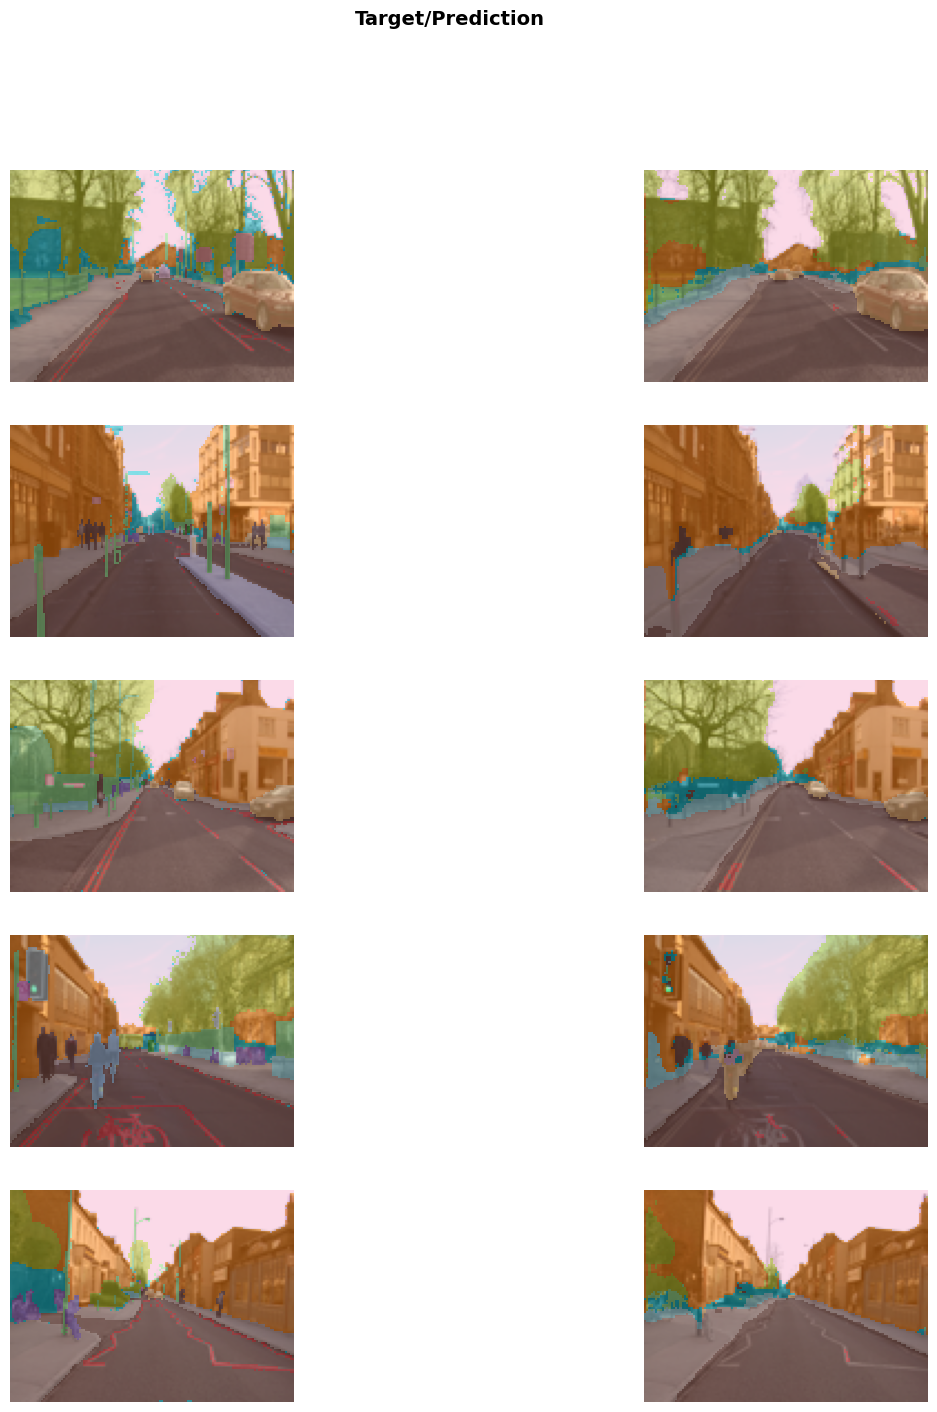

In [ ]:
learn.show_results(max_n=5, figsize=(15, 16))

### **Natural Language Processing (NLP)**

- ***Natural Language Processing*** - concerned with giving computers the ability to understand text and spoken words in much the same way human beings can.

***Sentiment Analysis*** - the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral.

We will build binary sentiment classification model: `positive` or `negative`.
- **Model:** [ASGD Weight-Dropped LSTM](https://arxiv.org/abs/1708.02182v1)
- **Dataset:** [IMDb Review](https://ai.stanford.edu/~amaas/data/sentiment/)

In [ ]:
from fastai.text.all import *

# Dataset
path = untar_data(URLs.IMDB)

# Data Loders
dls = TextDataLoaders.from_folder(path, train='train', valid='test')

# Fine-tune
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.462340,0.410291,0.822240,03:37


epoch,train_loss,valid_loss,accuracy,time
0,0.300573,0.244034,0.901000,07:34
1,0.252719,0.236890,0.901040,07:32
2,0.193620,0.188997,0.927400,07:33
3,0.152998,0.194714,0.928440,07:34


In [ ]:
learn.predict("I hate that movie")  # negative

('neg', tensor(0), tensor([0.6323, 0.3677]))

In [ ]:
learn.predict("I really like the movie")  # positive

('pos', tensor(1), tensor([0.0172, 0.9828]))

In [ ]:
learn.predict("I don't think this movie is bad")  # neutral

('neg', tensor(0), tensor([0.9818, 0.0182]))

### **Tabular Data & Tabular Model**

- **Tabular Data** refers to information that is organized in a table or spreadsheet format with rows and columns.

- **Tabular Model** is a type of data model that is used in business intelligence and data analytics to organize and analyze tabular data.

- **Dataset** - [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/adult)

- `fit_one_cycle()` - method is used to train a model with a 1cycle learning rate policy. This method is a type of cyclical learning rate (CLR) policy that sets the learning rate of the optimizer on a cycle that linearly increases and then decreases the learning rate during training.

In [2]:
from fastai.tabular.all import *

# Dataset
path = untar_data(URLs.ADULT_SAMPLE)

# Data Loaders
dls = TabularDataLoaders.from_csv(
    path/'adult.csv', path=path, bs=64, y_names='salary', skipinitialspace=False,
    cat_names=['workclass', 'education', 'marital-status','occupation',
               'relationship', 'race', 'sex'],
    cont_names= ['age', 'fnlwgt', 'education-num', 'capital-gain',
                 'capital-loss', 'hours-per-week'], 
    procs = [Categorify, FillMissing, Normalize]
)

# Train
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.375325,0.353063,0.839681,00:08
1,0.330146,0.329627,0.844441,00:04
2,0.339292,0.321188,0.850123,00:04
3,0.315940,0.323876,0.849355,00:04


In [6]:
import pandas as pd

pd.read_csv(path/'adult.csv')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,36,Private,297449,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Male,14084,0,40,United-States,>=50k
32557,23,?,123983,Bachelors,13.0,Never-married,?,Own-child,Other,Male,0,0,40,United-States,<50k
32558,53,Private,157069,Assoc-acdm,12.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>=50k
32559,32,Local-gov,217296,HS-grad,9.0,Married-civ-spouse,Transport-moving,Wife,White,Female,4064,0,22,United-States,<50k


In [4]:
# Testing
row, pred, probs = learn.predict(df.iloc[4])
pred.item(), probs

(0, tensor([0.8393, 0.1607]))

We built a model that can predict if the annual salary is less than `50k`, then it is class `0`, and vice versa, if it is equal to or above `50k`, it is class `1`.

#### **Loan Prediction with Tabular Model**

- ***Loan Prediction*** is a classification problem where we have to predict whether a loan would be approved or not.

- **Dataset**: [Loan Default Dataset](https://www.kaggle.com/yasserh/loan-default-dataset)

In [10]:
pd.read_csv("Loan_Default.csv")

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [9]:
from fastai.tabular.all import *

# Path
path = Path('.')

# Data Loaders
dls = TabularDataLoaders.from_csv(
    path/'Loan_Default.csv', path=path, bs=64, y_names='Status',
    cat_names=['loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
               'loan_purpose', 'Credit_Worthiness', 'open_credit',
               'business_or_commercial', 'interest_only', 'lump_sum_payment',
               'co-applicant_credit_type', 'submission_of_application', 'Region'],
    cont_names=['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
                'Upfront_charges', 'term', 'property_value', 'income',
                'Credit_Score',  'LTV', 'dtir1'],
    procs=[Categorify, FillMissing, Normalize]
)

# Train
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.003627,0.001193,0.753716,00:24
1,0.002725,0.000428,0.753716,00:24


In [11]:
learn.show_results(max_n=64)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,interest_only,lump_sum_payment,co-applicant_credit_type,submission_of_application,Region,rate_of_interest_na,Interest_rate_spread_na,Upfront_charges_na,term_na,property_value_na,income_na,LTV_na,dtir1_na,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,Status,Status_pred
0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.925738,-0.086831,-0.088217,-0.163245,0.425313,0.397001,0.066359,-1.583929,1.157750,-1.133315,1.0,1.002054
1,1.0,4.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.731397,-1.087677,-0.823387,0.192492,-2.655658,-0.527364,-0.318607,-1.074921,-0.290910,-1.651134,0.0,0.022736
2,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.460261,2.231456,2.197037,-0.450563,0.425313,-0.671796,-0.356164,1.125028,0.719407,1.041524,0.0,0.014083
3,1.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.166556,-0.086831,-0.088217,-0.163245,0.425313,0.628092,0.498272,0.572884,0.135273,0.420142,1.0,1.002019
4,1.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.624284,-1.853631,-0.567802,0.355701,-2.655658,0.454773,0.010023,0.823074,-0.128413,0.937961,0.0,0.003251
5,1.0,3.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.514488,-0.321724,0.036551,0.270187,0.425313,-0.527364,-0.478227,1.323455,0.122429,0.834397,0.0,0.019875
6,1.0,1.0,1.0,2.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,-0.622943,-0.086831,-0.088217,-0.163245,0.425313,-0.209614,-1.079149,1.323455,0.069919,0.109450,1.0,0.999294
7,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.080670,-0.577042,-0.184537,0.886613,-0.190881,-0.094068,0.216590,-0.729831,-0.122032,-1.858262,0.0,0.012342
8,1.0,2.0,1.0,3.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.082012,-0.086831,-0.308185,-1.093931,0.425313,-0.382932,-0.177766,-1.420011,0.759034,0.109450,0.0,0.016667
9,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.570057,0.444230,0.657929,2.116181,0.425313,0.079250,-0.187155,0.797193,0.360518,1.973598,0.0,0.022837
